<a href="https://colab.research.google.com/github/JANNATUL-PROG/Library-Management-System/blob/main/Library_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File not found.

--- Library Management System ---
1. Add Book
2. Remove Book
3. Register Member
4. Borrow Book
5. Return Book
6. Display Books
7. Display Members
8. Save Data
9. Visualize Data
10. Exit
Enter your choice (1-10): 1
Enter Book ID: 3
Enter Title: 2
Enter Author: 3
Enter Number of Copies: 4
Book '2' added/updated successfully.

--- Library Management System ---
1. Add Book
2. Remove Book
3. Register Member
4. Borrow Book
5. Return Book
6. Display Books
7. Display Members
8. Save Data
9. Visualize Data
10. Exit
Enter your choice (1-10): 3
Enter Member ID: 4
Enter Member Name: 2
Member '2' registered successfully.

--- Library Management System ---
1. Add Book
2. Remove Book
3. Register Member
4. Borrow Book
5. Return Book
6. Display Books
7. Display Members
8. Save Data
9. Visualize Data
10. Exit
Enter your choice (1-10): 6
ID: 3, Title: 2, Author: 3, Copies: 4

--- Library Management System ---
1. Add Book
2. Remove Book
3. Register Member
4. Borrow Book
5. Return Book
6. 

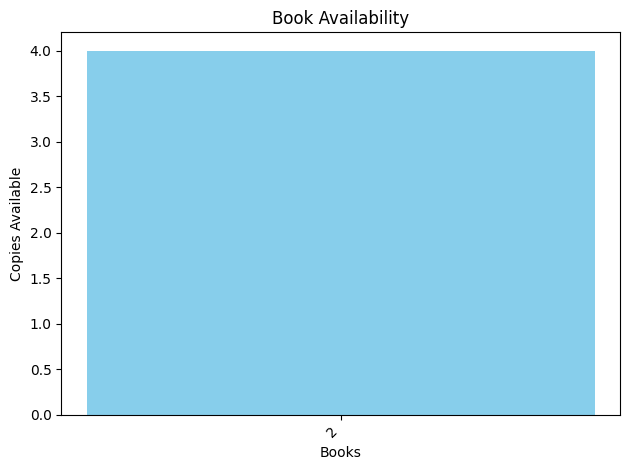


--- Library Management System ---
1. Add Book
2. Remove Book
3. Register Member
4. Borrow Book
5. Return Book
6. Display Books
7. Display Members
8. Save Data
9. Visualize Data
10. Exit
Enter your choice (1-10): 10
Exiting the system. Goodbye!


In [ ]:
ort json
import matplotlib.pyplot as plt

class Book:
    def __init__(self, book_id, title, author, copies):
        self.book_id = book_id
        self.title = title
        self.author = author
        self.copies = copies

    def __str__(self):
        return f"ID: {self.book_id}, Title: {self.title}, Author: {self.author}, Copies: {self.copies}"

class Member:
    def __init__(self, member_id, name):
        self.member_id = member_id
        self.name = name
        self.borrowed_books = []

    def __str__(self):
        return f"ID: {self.member_id}, Name: {self.name}, Borrowed Books: {len(self.borrowed_books)}"

class Library:
    def __init__(self):
        self.books = {}
        self.members = {}

    def add_book(self, book):
        if book.book_id in self.books:
            self.books[book.book_id].copies += book.copies
        else:
            self.books[book.book_id] = book
        print(f"Book '{book.title}' added/updated successfully.")

    def remove_book(self, book_id):
        if book_id in self.books:
            del self.books[book_id]
            print("Book removed successfully.")
        else:
            print("Book not found.")

    def register_member(self, member):
        if member.member_id in self.members:
            print("Member already exists.")
        else:
            self.members[member.member_id] = member
            print(f"Member '{member.name}' registered successfully.")

    def borrow_book(self, member_id, book_id):
        if member_id not in self.members:
            print("Member not found.")
            return
        if book_id not in self.books:
            print("Book not found.")
            return
        if self.books[book_id].copies > 0:
            self.members[member_id].borrowed_books.append(book_id)
            self.books[book_id].copies -= 1
            print(f"Book '{self.books[book_id].title}' borrowed by {self.members[member_id].name}.")
        else:
            print("No copies available.")

    def return_book(self, member_id, book_id):
        if member_id not in self.members:
            print("Member not found.")
            return
        if book_id in self.members[member_id].borrowed_books:
            self.members[member_id].borrowed_books.remove(book_id)
            self.books[book_id].copies += 1
            print(f"Book '{self.books[book_id].title}' returned by {self.members[member_id].name}.")
        else:
            print("This book was not borrowed by the member.")

    def save_data(self, filename):
        data = {
            "books": {book_id: vars(book) for book_id, book in self.books.items()},
            "members": {member_id: vars(member) for member_id, member in self.members.items()}
        }
        with open(filename, 'w') as f:
            json.dump(data, f)
        print("Data saved successfully.")

    def load_data(self, filename):
        try:
            with open(filename, 'r') as f:
                data = json.load(f)
                self.books = {book_id: Book(**details) for book_id, details in data["books"].items()}
                self.members = {member_id: Member(**details) for member_id, details in data["members"].items()}
            print("Data loaded successfully.")
        except FileNotFoundError:
            print("File not found.")

    def visualize_data(self):
        book_titles = [book.title for book in self.books.values()]
        copies = [book.copies for book in self.books.values()]

        plt.bar(book_titles, copies, color='skyblue')
        plt.xlabel('Books')
        plt.ylabel('Copies Available')
        plt.title('Book Availability')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Main execution
if __name__ == "__main__":
    library = Library()
    library.load_data("library_data.json")

    while True:
        print("\n--- Library Management System ---")
        print("1. Add Book")
        print("2. Remove Book")
        print("3. Register Member")
        print("4. Borrow Book")
        print("5. Return Book")
        print("6. Display Books")
        print("7. Display Members")
        print("8. Save Data")
        print("9. Visualize Data")
        print("10. Exit")

        choice = input("Enter your choice (1-10): ")

        if choice == "1":
            book_id = input("Enter Book ID: ")
            title = input("Enter Title: ")
            author = input("Enter Author: ")
            copies = int(input("Enter Number of Copies: "))
            library.add_book(Book(book_id, title, author, copies))

        elif choice == "2":
            book_id = input("Enter Book ID to remove: ")
            library.remove_book(book_id)

        elif choice == "3":
            member_id = input("Enter Member ID: ")
            name = input("Enter Member Name: ")
            library.register_member(Member(member_id, name))

        elif choice == "4":
            member_id = input("Enter Member ID: ")
            book_id = input("Enter Book ID: ")
            library.borrow_book(member_id, book_id)

        elif choice == "5":
            member_id = input("Enter Member ID: ")
            book_id = input("Enter Book ID: ")
            library.return_book(member_id, book_id)

        elif choice == "6":
            for book in library.books.values():
                print(book)

        elif choice == "7":
            for member in library.members.values():
                print(member)

        elif choice == "8":
            library.save_data("library_data.json")

        elif choice == "9":
            library.visualize_data()

        elif choice == "10":
            print("Exiting the system. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")
